In [1]:
import astropy.io.fits as pf
import pylab as mplot
%pylab inline

mplot.rc('text', usetex=True)
mplot.rc('font', family='serif')

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


## First plot the simulation data vector

In [2]:
infile = pf.open('/project/chihway/chihway/CosmicShearCosmosis/datavectors/baseline_April23rd2024.fits')

In [3]:
infile.info()

Filename: /project/chihway/chihway/CosmicShearCosmosis/datavectors/baseline_April23rd2024.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       4   ()      
  1  COVMAT        1 ImageHDU        13   (400, 400)   float64   
  2  xip           1 BinTableHDU     35   200R x 7C   [K, K, K, D, D, D, D]   
  3  xim           1 BinTableHDU     35   200R x 7C   [K, K, K, D, D, D, D]   
  4  nz_source     1 BinTableHDU     24   101R x 7C   [D, D, D, D, D, D, D]   


/home/chihway/ipykernel_1497135/959685433.py:19: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "." (-> marker='.'). The keyword argument will take precedence.
  ax[i][j].errorbar(theta_xip, theta_xip*xip, theta_xip*xip_err, color='g', lw=1, marker='.', fmt='.', capthick=0.8, capsize=2.2, zorder=3, label='('+str(i+1)+','+str(j+1)+') $\\xi_{+}$')
/home/chihway/ipykernel_1497135/959685433.py:29: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "." (-> marker='.'). The keyword argument will take precedence.
  ax[4-i][3-j].errorbar(theta_xim, theta_xim*xim, theta_xim*xim_err, color='r', lw=1, marker='.', fmt='.', capthick=0.8, capsize=2.2, zorder=3, label='('+str(i+1)+','+str(j+1)+') $\\xi_{-}$')


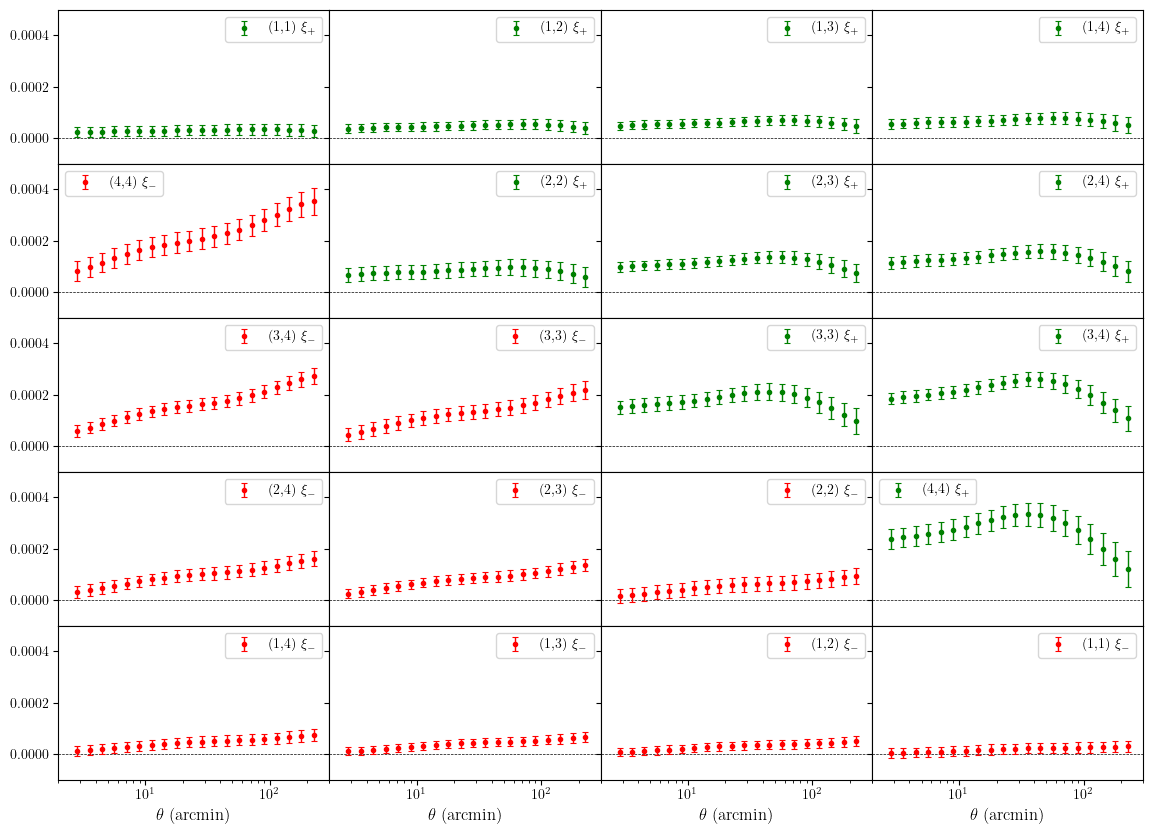

In [4]:
fig, ax = plt.subplots(5,4, sharey=True, figsize=(14,10))
fig.subplots_adjust(wspace=0.0, hspace=0.0)

n=0
for i in range(4):
    for j in range(4):
        if j>=i:

            mask = (infile['xip'].data['BIN1']==i+1)*(infile['xip'].data['BIN2']==j+1)
            theta_xip = infile['xip'].data['ANG'][mask]
            xip = infile['xip'].data['VALUE'][mask]
            xip_err = np.diag(infile['COVMAT'].data)[n*20:(n+1)*20]**0.5
            
            mask = (infile['xim'].data['BIN1']==i+1)*(infile['xim'].data['BIN2']==j+1)
            theta_xim = infile['xim'].data['ANG'][mask]
            xim = infile['xim'].data['VALUE'][mask]
            xim_err = np.diag(infile['COVMAT'].data)[200+n*20:200+(n+1)*20]**0.5
            
            ax[i][j].errorbar(theta_xip, theta_xip*xip, theta_xip*xip_err, color='g', lw=1, marker='.', fmt='.', capthick=0.8, capsize=2.2, zorder=3, label='('+str(i+1)+','+str(j+1)+') $\\xi_{+}$')
            ax[i][j].set_xscale('log')
            ax[i][j].set_xlim(2,300)
            ax[i][j].set_ylim(-0.0001,0.0005)
            ax[i][j].legend()
            
            ax[i][j].set_xlabel('$\\theta$ (arcmin)', fontsize=12) 
            ax[i][j].plot([2,300],[0,0], color='k', lw=0.5, ls='--')
        

            ax[4-i][3-j].errorbar(theta_xim, theta_xim*xim, theta_xim*xim_err, color='r', lw=1, marker='.', fmt='.', capthick=0.8, capsize=2.2, zorder=3, label='('+str(i+1)+','+str(j+1)+') $\\xi_{-}$')
            ax[4-i][3-j].set_xscale('log')
            ax[4-i][3-j].set_xlim(2,300)
            ax[4-i][3-j].set_ylim(-0.0001,0.0005)
            ax[4-i][3-j].legend()
            
            
            ax[4-i][3-j].set_xlabel('$\\theta$ (arcmin)', fontsize=12) 
            ax[4-i][3-j].plot([2,300],[0,0], color='k', lw=0.5, ls='--')

            n+=1

/home/chihway/ipykernel_1497135/3869230410.py:19: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "." (-> marker='.'). The keyword argument will take precedence.
  ax[i][j].errorbar(theta_xip, xip, xip_err, color='g', lw=1, marker='.', fmt='.', capthick=0.8, capsize=2.2, zorder=3, label='('+str(i+1)+','+str(j+1)+') $\\xi_{+}$')
/home/chihway/ipykernel_1497135/3869230410.py:30: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "." (-> marker='.'). The keyword argument will take precedence.
  ax[4-i][3-j].errorbar(theta_xim, xim, xim_err, color='r', lw=1, marker='.', fmt='.', capthick=0.8, capsize=2.2, zorder=3, label='('+str(i+1)+','+str(j+1)+') $\\xi_{-}$')


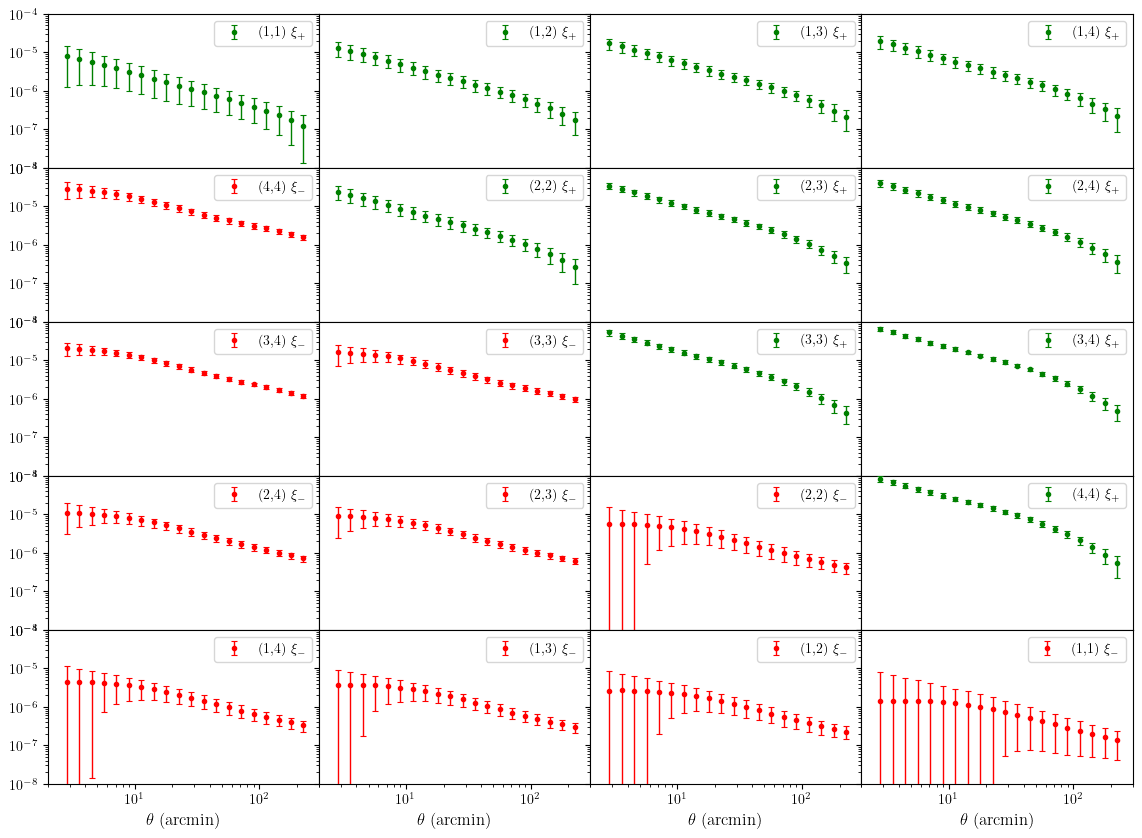

In [5]:
fig, ax = plt.subplots(5,4, sharey=True, figsize=(14,10))
fig.subplots_adjust(wspace=0.0, hspace=0.0)

n=0
for i in range(4):
    for j in range(4):
        if j>=i:

            mask = (infile['xip'].data['BIN1']==i+1)*(infile['xip'].data['BIN2']==j+1)
            theta_xip = infile['xip'].data['ANG'][mask]
            xip = infile['xip'].data['VALUE'][mask]
            xip_err = np.diag(infile['COVMAT'].data)[n*20:(n+1)*20]**0.5
            
            mask = (infile['xim'].data['BIN1']==i+1)*(infile['xim'].data['BIN2']==j+1)
            theta_xim = infile['xim'].data['ANG'][mask]
            xim = infile['xim'].data['VALUE'][mask]
            xim_err = np.diag(infile['COVMAT'].data)[200+n*20:200+(n+1)*20]**0.5
            
            ax[i][j].errorbar(theta_xip, xip, xip_err, color='g', lw=1, marker='.', fmt='.', capthick=0.8, capsize=2.2, zorder=3, label='('+str(i+1)+','+str(j+1)+') $\\xi_{+}$')
            ax[i][j].set_xscale('log')
            ax[i][j].set_yscale('log')
            ax[i][j].set_xlim(2,300)
            ax[i][j].set_ylim(1e-8, 1e-4)
            ax[i][j].legend()
            
            ax[i][j].set_xlabel('$\\theta$ (arcmin)', fontsize=12) 
            ax[i][j].plot([2,300],[0,0], color='k', lw=0.5, ls='--')
        

            ax[4-i][3-j].errorbar(theta_xim, xim, xim_err, color='r', lw=1, marker='.', fmt='.', capthick=0.8, capsize=2.2, zorder=3, label='('+str(i+1)+','+str(j+1)+') $\\xi_{-}$')
            ax[4-i][3-j].set_xscale('log')
            ax[4-i][3-j].set_xlim(2,300)
            ax[i][j].set_yscale('log')
            ax[i][j].set_xlim(2,300)
            ax[i][j].set_ylim(1e-8, 1e-4)
            ax[4-i][3-j].legend()
            
            
            ax[4-i][3-j].set_xlabel('$\\theta$ (arcmin)', fontsize=12) 
            ax[4-i][3-j].plot([2,300],[0,0], color='k', lw=0.5, ls='--')

            n+=1

## Now the blinded DV

In [13]:
infile = pf.open('/project/chihway/chihway/CosmicShearCosmosis/datavectors/data_08052024_BLINDED.fits')

In [14]:
infile.info()

Filename: /project/chihway/chihway/CosmicShearCosmosis/datavectors/data_08052024_BLINDED.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       4   ()      
  1  COVMAT        1 ImageHDU        13   (400, 400)   float64   
  2  xip           1 BinTableHDU     37   200R x 7C   [K, K, K, D, D, D, D]   
  3  xim           1 BinTableHDU     37   200R x 7C   [K, K, K, D, D, D, D]   
  4  nz_source     1 BinTableHDU     24   101R x 7C   [D, D, D, D, D, D, D]   


In [15]:
infile['xip'].header

XTENSION= 'BINTABLE'           / binary table extension                         
BITPIX  =                    8 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                   56 / length of dimension 1                          
NAXIS2  =                  200 / length of dimension 2                          
PCOUNT  =                    0 / number of group parameters                     
GCOUNT  =                    1 / number of groups                               
TFIELDS =                    7 / number of table fields                         
2PTDATA =                    T                                                  
EXTNAME = 'xip     '                                                            
QUANT1  = 'G+R     '                                                            
QUANT2  = 'G+R     '                                                            
KERNEL_1= 'nz_source'       

In [16]:
infile['xip'].data['value'][:20]

array([ 1.77264484e-05,  1.08971939e-05,  2.82519498e-06,  4.16119819e-06,
        3.67058612e-06,  8.77302434e-06,  3.45857138e-06,  2.97075181e-06,
       -2.96127882e-08,  2.96495035e-06,  5.68582619e-07,  1.51561265e-06,
        8.54264407e-07,  7.05262936e-07,  5.51846814e-08,  1.76971149e-07,
        7.19030541e-07,  2.52821602e-07,  1.48997524e-07,  2.72373250e-07])

In [17]:
infile['COVMAT'].header

XTENSION= 'IMAGE   '           / Image extension                                
BITPIX  =                  -64 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                  400                                                  
NAXIS2  =                  400                                                  
PCOUNT  =                    0 / number of parameters                           
GCOUNT  =                    1 / number of groups                               
COVDATA =                    T                                                  
EXTNAME = 'COVMAT  '                                                            
STRT_0  =                    0                                                  
NAME_0  = 'xip     '                                                            
STRT_1  =                  200                                                  
NAME_1  = 'xim     '        

/home/chihway/ipykernel_1497135/4042684267.py:19: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "." (-> marker='.'). The keyword argument will take precedence.
  ax[i][j].errorbar(theta_xip, theta_xip*xip, theta_xip*xip_err, color='g', lw=1, marker='.', fmt='.', capthick=0.8, capsize=2.2, zorder=3, label='('+str(i+1)+','+str(j+1)+') $\\xi_{+}$')
/home/chihway/ipykernel_1497135/4042684267.py:29: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "." (-> marker='.'). The keyword argument will take precedence.
  ax[4-i][3-j].errorbar(theta_xim, theta_xim*xim, theta_xim*xim_err, color='r', lw=1, marker='.', fmt='.', capthick=0.8, capsize=2.2, zorder=3, label='('+str(i+1)+','+str(j+1)+') $\\xi_{-}$')


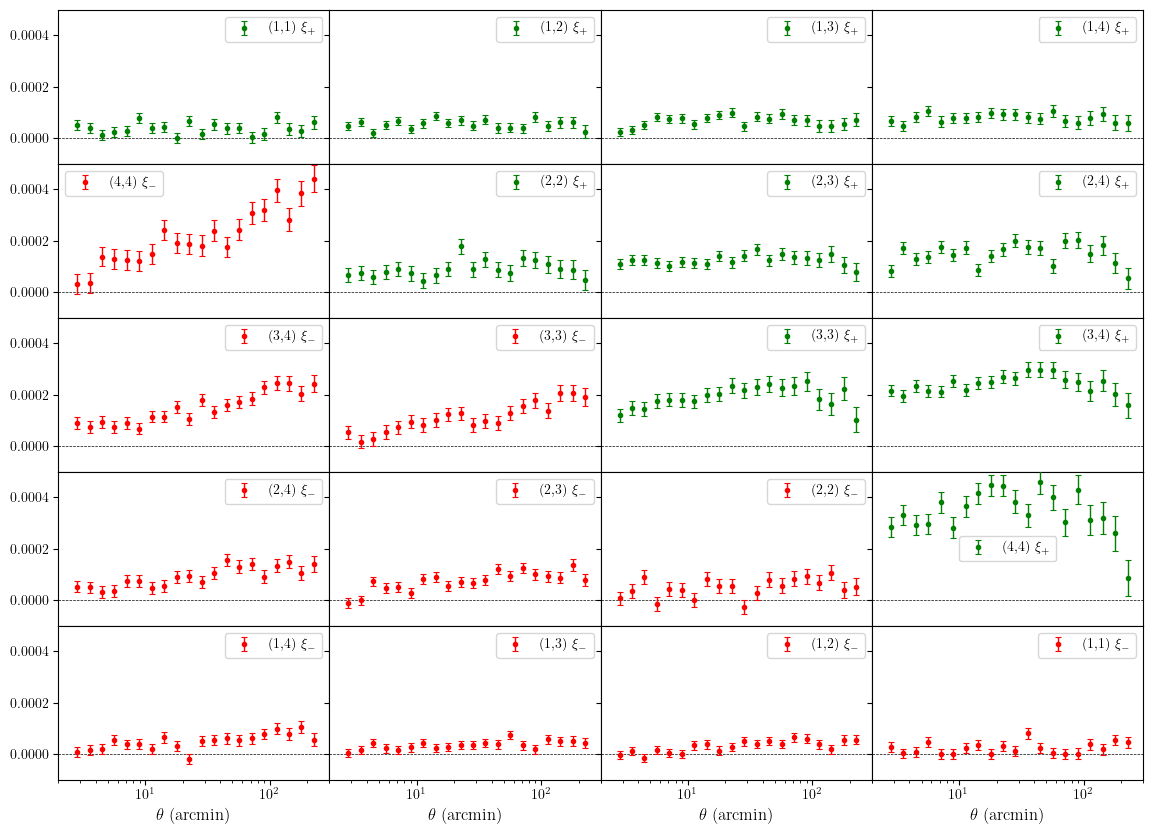

In [18]:
fig, ax = plt.subplots(5,4, sharey=True, figsize=(14,10))
fig.subplots_adjust(wspace=0.0, hspace=0.0)

n=0
for i in range(4):
    for j in range(4):
        if j>=i:

            mask = (infile['xip'].data['BIN1']==i+1)*(infile['xip'].data['BIN2']==j+1)
            theta_xip = infile['xip'].data['ANG'][mask]
            xip = infile['xip'].data['VALUE'][mask]
            xip_err = np.diag(infile['COVMAT'].data)[n*20:(n+1)*20]**0.5
            
            mask = (infile['xim'].data['BIN1']==i+1)*(infile['xim'].data['BIN2']==j+1)
            theta_xim = infile['xim'].data['ANG'][mask]
            xim = infile['xim'].data['VALUE'][mask]
            xim_err = np.diag(infile['COVMAT'].data)[200+n*20:200+(n+1)*20]**0.5
            
            ax[i][j].errorbar(theta_xip, theta_xip*xip, theta_xip*xip_err, color='g', lw=1, marker='.', fmt='.', capthick=0.8, capsize=2.2, zorder=3, label='('+str(i+1)+','+str(j+1)+') $\\xi_{+}$')
            ax[i][j].set_xscale('log')
            ax[i][j].set_xlim(2,300)
            ax[i][j].set_ylim(-0.0001,0.0005)
            ax[i][j].legend()
            
            ax[i][j].set_xlabel('$\\theta$ (arcmin)', fontsize=12) 
            ax[i][j].plot([2,300],[0,0], color='k', lw=0.5, ls='--')
        

            ax[4-i][3-j].errorbar(theta_xim, theta_xim*xim, theta_xim*xim_err, color='r', lw=1, marker='.', fmt='.', capthick=0.8, capsize=2.2, zorder=3, label='('+str(i+1)+','+str(j+1)+') $\\xi_{-}$')
            ax[4-i][3-j].set_xscale('log')
            ax[4-i][3-j].set_xlim(2,300)
            ax[4-i][3-j].set_ylim(-0.0001,0.0005)
            ax[4-i][3-j].legend()
            
            
            ax[4-i][3-j].set_xlabel('$\\theta$ (arcmin)', fontsize=12) 
            ax[4-i][3-j].plot([2,300],[0,0], color='k', lw=0.5, ls='--')
            
            # if i==0:
            #     ax[i].set_ylabel('$\\theta \\times \langle \\delta_{\\rm g} \\kappa_{\\rm CMB}\\rangle$', fontsize=12) 
            #     ax[i].text(3,-0.02, 'DES $\\times$ ACT')
        
            #     frame1 = plt.gca()
            #     for xlabel_i in ax[i].get_yticklabels():
            #         xlabel_i.set_fontsize(0.0)
            #         xlabel_i.set_visible(False)
            n+=1

/home/chihway/ipykernel_1497135/3869230410.py:19: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "." (-> marker='.'). The keyword argument will take precedence.
  ax[i][j].errorbar(theta_xip, xip, xip_err, color='g', lw=1, marker='.', fmt='.', capthick=0.8, capsize=2.2, zorder=3, label='('+str(i+1)+','+str(j+1)+') $\\xi_{+}$')
/home/chihway/ipykernel_1497135/3869230410.py:30: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "." (-> marker='.'). The keyword argument will take precedence.
  ax[4-i][3-j].errorbar(theta_xim, xim, xim_err, color='r', lw=1, marker='.', fmt='.', capthick=0.8, capsize=2.2, zorder=3, label='('+str(i+1)+','+str(j+1)+') $\\xi_{-}$')


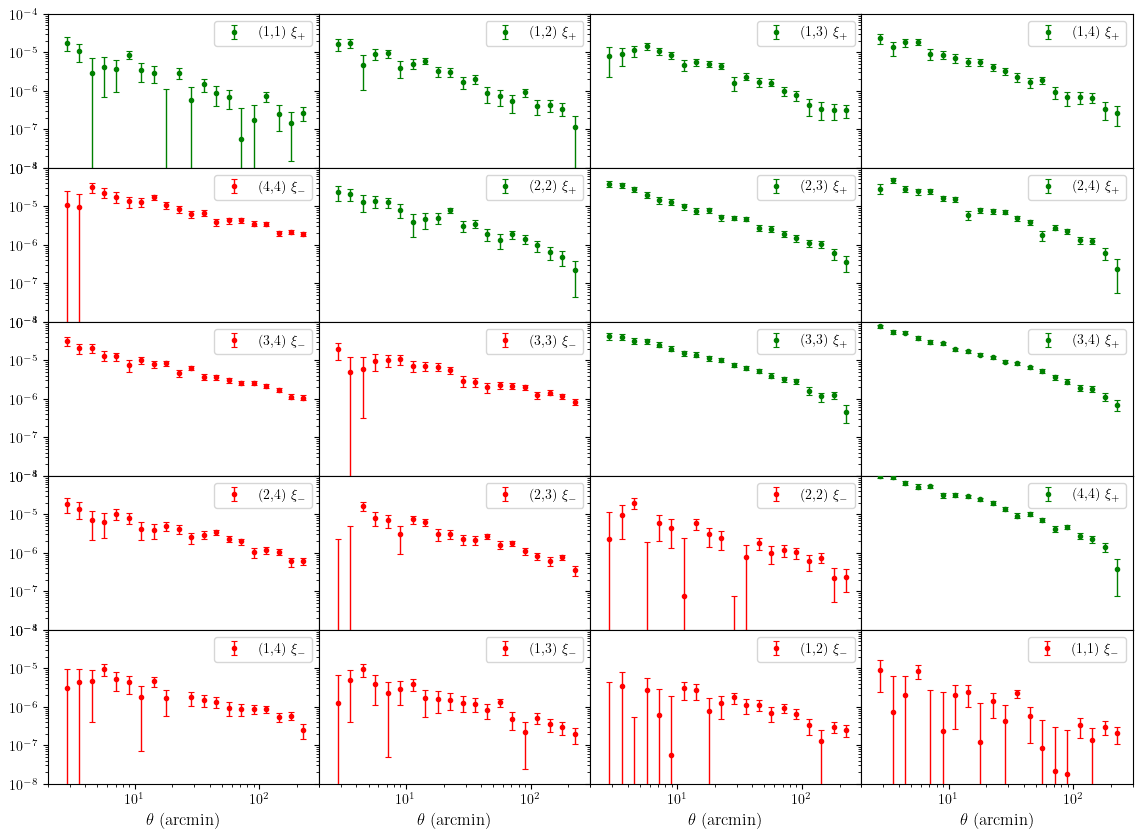

In [19]:
fig, ax = plt.subplots(5,4, sharey=True, figsize=(14,10))
fig.subplots_adjust(wspace=0.0, hspace=0.0)

n=0
for i in range(4):
    for j in range(4):
        if j>=i:

            mask = (infile['xip'].data['BIN1']==i+1)*(infile['xip'].data['BIN2']==j+1)
            theta_xip = infile['xip'].data['ANG'][mask]
            xip = infile['xip'].data['VALUE'][mask]
            xip_err = np.diag(infile['COVMAT'].data)[n*20:(n+1)*20]**0.5
            
            mask = (infile['xim'].data['BIN1']==i+1)*(infile['xim'].data['BIN2']==j+1)
            theta_xim = infile['xim'].data['ANG'][mask]
            xim = infile['xim'].data['VALUE'][mask]
            xim_err = np.diag(infile['COVMAT'].data)[200+n*20:200+(n+1)*20]**0.5
            
            ax[i][j].errorbar(theta_xip, xip, xip_err, color='g', lw=1, marker='.', fmt='.', capthick=0.8, capsize=2.2, zorder=3, label='('+str(i+1)+','+str(j+1)+') $\\xi_{+}$')
            ax[i][j].set_xscale('log')
            ax[i][j].set_yscale('log')
            ax[i][j].set_xlim(2,300)
            ax[i][j].set_ylim(1e-8, 1e-4)
            ax[i][j].legend()
            
            ax[i][j].set_xlabel('$\\theta$ (arcmin)', fontsize=12) 
            ax[i][j].plot([2,300],[0,0], color='k', lw=0.5, ls='--')
        

            ax[4-i][3-j].errorbar(theta_xim, xim, xim_err, color='r', lw=1, marker='.', fmt='.', capthick=0.8, capsize=2.2, zorder=3, label='('+str(i+1)+','+str(j+1)+') $\\xi_{-}$')
            ax[4-i][3-j].set_xscale('log')
            ax[4-i][3-j].set_xlim(2,300)
            ax[i][j].set_yscale('log')
            ax[i][j].set_xlim(2,300)
            ax[i][j].set_ylim(1e-8, 1e-4)
            ax[4-i][3-j].legend()
            
            
            ax[4-i][3-j].set_xlabel('$\\theta$ (arcmin)', fontsize=12) 
            ax[4-i][3-j].plot([2,300],[0,0], color='k', lw=0.5, ls='--')

            n+=1

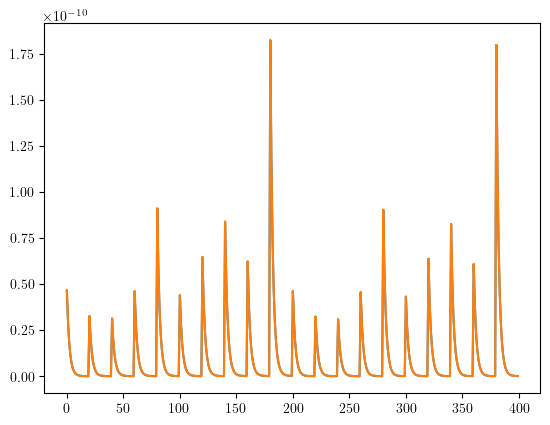

## Now Y3 DV

In [20]:
infile = pf.open('/project/chihway/chihway/y3-6x2pt-new/y3-6x2pt/cosmosis_act/datavec/rename_to_act_y3_5x2_maglim_UNBLIND_07202021_120721_bestfit3x2.fits')

/home/chihway/ipykernel_415734/3869230410.py:19: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "." (-> marker='.'). The keyword argument will take precedence.
  ax[i][j].errorbar(theta_xip, xip, xip_err, color='g', lw=1, marker='.', fmt='.', capthick=0.8, capsize=2.2, zorder=3, label='('+str(i+1)+','+str(j+1)+') $\\xi_{+}$')
/home/chihway/ipykernel_415734/3869230410.py:30: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "." (-> marker='.'). The keyword argument will take precedence.
  ax[4-i][3-j].errorbar(theta_xim, xim, xim_err, color='r', lw=1, marker='.', fmt='.', capthick=0.8, capsize=2.2, zorder=3, label='('+str(i+1)+','+str(j+1)+') $\\xi_{-}$')


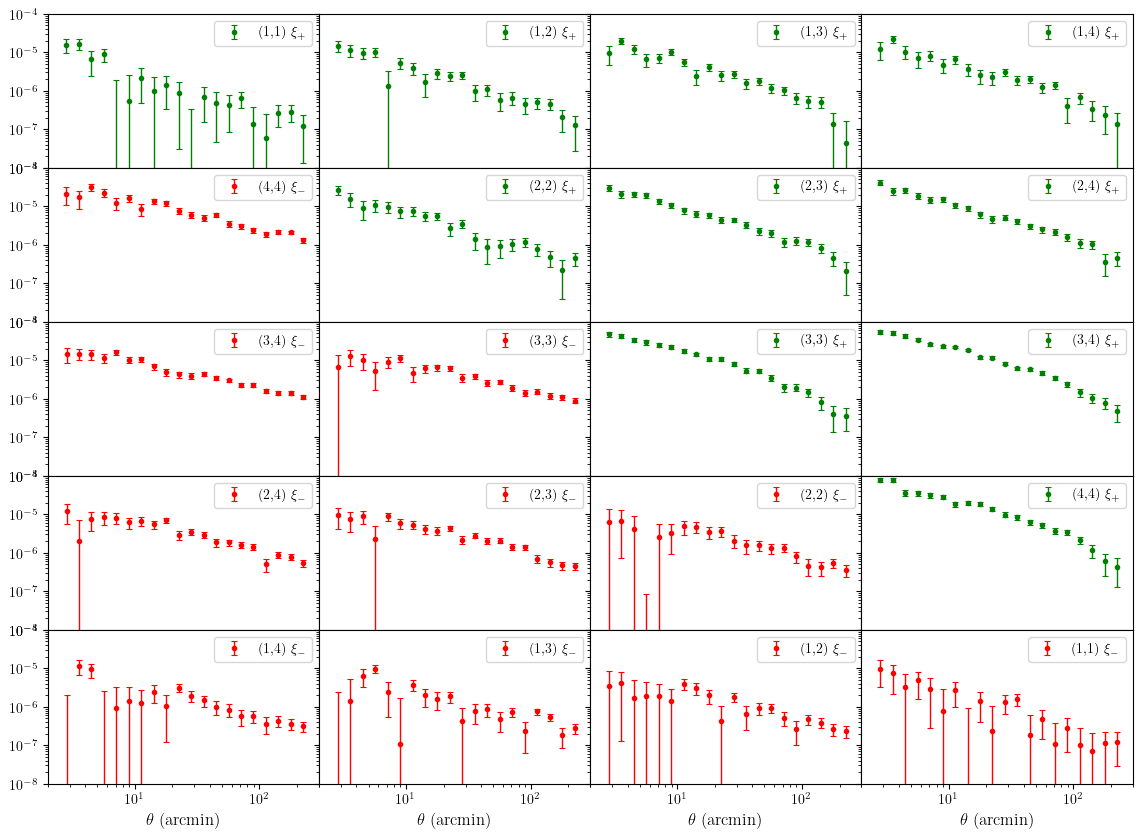

In [21]:
fig, ax = plt.subplots(5,4, sharey=True, figsize=(14,10))
fig.subplots_adjust(wspace=0.0, hspace=0.0)

n=0
for i in range(4):
    for j in range(4):
        if j>=i:

            mask = (infile['xip'].data['BIN1']==i+1)*(infile['xip'].data['BIN2']==j+1)
            theta_xip = infile['xip'].data['ANG'][mask]
            xip = infile['xip'].data['VALUE'][mask]
            xip_err = np.diag(infile['COVMAT'].data)[n*20:(n+1)*20]**0.5
            
            mask = (infile['xim'].data['BIN1']==i+1)*(infile['xim'].data['BIN2']==j+1)
            theta_xim = infile['xim'].data['ANG'][mask]
            xim = infile['xim'].data['VALUE'][mask]
            xim_err = np.diag(infile['COVMAT'].data)[200+n*20:200+(n+1)*20]**0.5
            
            ax[i][j].errorbar(theta_xip, xip, xip_err, color='g', lw=1, marker='.', fmt='.', capthick=0.8, capsize=2.2, zorder=3, label='('+str(i+1)+','+str(j+1)+') $\\xi_{+}$')
            ax[i][j].set_xscale('log')
            ax[i][j].set_yscale('log')
            ax[i][j].set_xlim(2,300)
            ax[i][j].set_ylim(1e-8, 1e-4)
            ax[i][j].legend()
            
            ax[i][j].set_xlabel('$\\theta$ (arcmin)', fontsize=12) 
            ax[i][j].plot([2,300],[0,0], color='k', lw=0.5, ls='--')
        

            ax[4-i][3-j].errorbar(theta_xim, xim, xim_err, color='r', lw=1, marker='.', fmt='.', capthick=0.8, capsize=2.2, zorder=3, label='('+str(i+1)+','+str(j+1)+') $\\xi_{-}$')
            ax[4-i][3-j].set_xscale('log')
            ax[4-i][3-j].set_xlim(2,300)
            ax[i][j].set_yscale('log')
            ax[i][j].set_xlim(2,300)
            ax[i][j].set_ylim(1e-8, 1e-4)
            ax[4-i][3-j].legend()
            
            
            ax[4-i][3-j].set_xlabel('$\\theta$ (arcmin)', fontsize=12) 
            ax[4-i][3-j].plot([2,300],[0,0], color='k', lw=0.5, ls='--')

            n+=1

In [2]:
infile1 = pf.open('/project/chihway/chihway/CosmicShearCosmosis/datavectors/baseline_April23rd2024.fits')
infile2 = pf.open('/project/chihway/chihway/CosmicShearCosmosis/datavectors/data_08052024-v2_BLINDED.fits')
infile3 = pf.open('/project/chihway/chihway/y3-6x2pt-new/y3-6x2pt/cosmosis_act/datavec/rename_to_act_y3_5x2_maglim_UNBLIND_07202021_120721_bestfit3x2.fits')

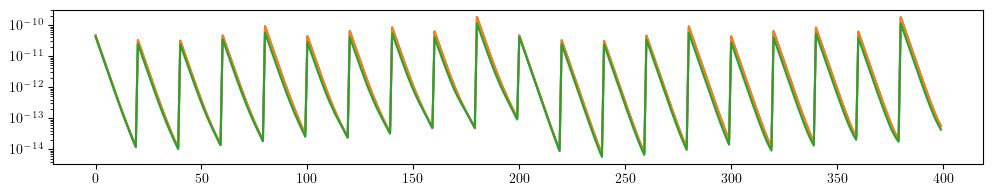

In [30]:
plt.figure(figsize=(12,2))
plt.plot(np.diag(infile1['covmat'].data))
plt.plot(np.diag(infile2['covmat'].data))
plt.plot(np.diag(infile3['covmat'].data)[:400])
plt.yscale('log')

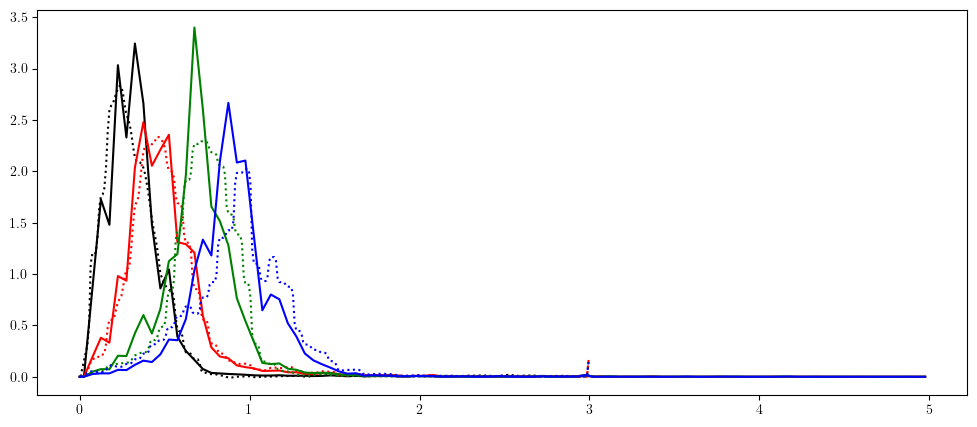

In [40]:
color=['k','r','g','b']
plt.figure(figsize=(12,5))
for i in range(4):
    plt.plot(infile1['nz_source'].data['z_mid'], infile1['nz_source'].data['bin'+str(i+1)], color=color[i])
    plt.plot(infile3['nz_source'].data['z_mid'], infile3['nz_source'].data['bin'+str(i+1)]*100, color=color[i], ls=':')

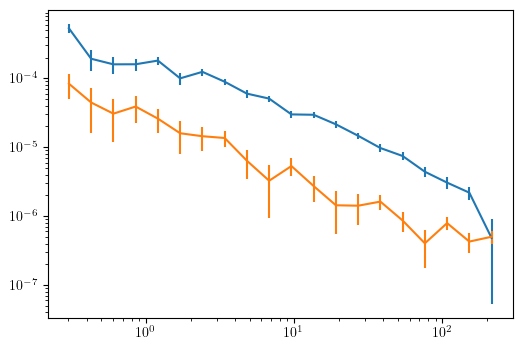

In [63]:
plt.figure(figsize=(6,4))
# plt.plot(np.diag(infile1['covmat'].data)[:20], color='k', label='analytical')
theta = np.loadtxt('/project/chihway/chihway/shearcat/shear_catalog/datavec/gg_4_4/mean_gg')[:,0]
xi = np.loadtxt('/project/chihway/chihway/shearcat/shear_catalog/datavec/gg_4_4/mean_gg')[:,1]
err = np.diag(np.loadtxt('/project/chihway/chihway/shearcat/shear_catalog/datavec/gg_4_4/cov_jk'))[:20]
plt.errorbar(theta, xi, yerr=err**0.5)
#, label='jk')

theta = np.loadtxt('/project/chihway/chihway/shearcat/shear_catalog/datavec/gg_1_1/mean_gg')[:,0]
xi = np.loadtxt('/project/chihway/chihway/shearcat/shear_catalog/datavec/gg_1_1/mean_gg')[:,1]
err = np.diag(np.loadtxt('/project/chihway/chihway/shearcat/shear_catalog/datavec/gg_1_1/cov_jk'))[:20]
plt.errorbar(theta, xi, yerr=err**0.5)


plt.xscale('log')
plt.yscale('log')
# plt.legend()

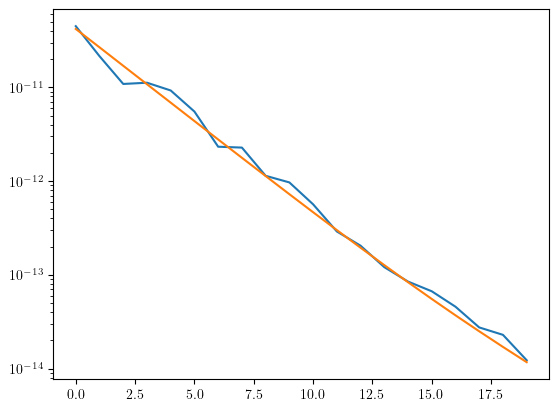

In [3]:
err = np.diag(np.loadtxt('/project/chihway/chihway/shearcat/shear_catalog/datavec/gg_1_1/cov_jk'))[:20]
err_2 = np.diag(infile3['COVMAT'].data)[:20]
plt.plot(err)
plt.plot(err_2)
plt.yscale('log')